# Oversampling 

As we saw in the previous notebook all models had not high precision and recall for churn class (the main class that we want to predict and find). This can be the result of our disbalance in classes. In the first notebook we saw that there are about 26% objects of class churn and 74% of class no churn.

Here we will use one technique of class balancing. Namely the simple oversampling technique. In other words we will duplicate objects of the smaller class 

In [5]:
from imblearn.over_sampling import RandomOverSampler
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [2]:
data=pd.read_csv("data.csv")
enc_data=pd.read_csv("encoded_data.csv")

## Content

<ol>
    <li><a href="#feature-scaling">Feature scaling</a></li>
    <li><a href="#oversampling">Oversampling</a></li>
    <li><a href="#knn">KNN</a>
        <ul>
            <li><a href="#knn-training">Training</a></li>
            <li><a href="#knn-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#logistic-regression">Logistic Regression</a>
        <ul>
            <li><a href="#logistic-regression-training">Training</a></li>
            <li><a href="#logistic-regression-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#svm">SVM</a>
        <ul>
            <li><a href="#svm-training">Training</a></li>
            <li><a href="#svm-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#random-forest">Random Forest</a>
        <ul>
            <li><a href="#random-forest-training">Training</a></li>
            <li><a href="#random-forest-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#ada-boost">AdaBoost</a>
        <ul>
            <li><a href="#ada-boost-training">Training</a></li>
            <li><a href="#ada-boost-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#conclusions">Conclusions</a></li>
</ol>

Since we are using simple oversampling we will do first splitting on train and test samples and only then perform oversampling on train sample. The reason for such a procedure is simple: if we do oversampling first and then splitting it can be that our train and test samples will have the same objects which is not good.

<a id="feature-scaling"></a>
## Feature scaling

In [3]:
X = enc_data.drop(columns = ['Churn', "customerID"])
y = enc_data['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=5, stratify=y)

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<a id="oversampling"></a>
## Oversampling


In [15]:
oversample = RandomOverSampler(sampling_strategy='minority')

X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)

pd.Series(y_resampled).value_counts()

0.0    3880
1.0    3880
Name: count, dtype: int64

<a id="knn"></a>
## KNN 

In [17]:
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_resampled,y_resampled)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7325383304940375


<a id="knn-evaluating"></a>
### KNN Evaluating

In [18]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.88      0.73      0.80      1294
         1.0       0.50      0.73      0.59       467

    accuracy                           0.73      1761
   macro avg       0.69      0.73      0.70      1761
weighted avg       0.78      0.73      0.75      1761



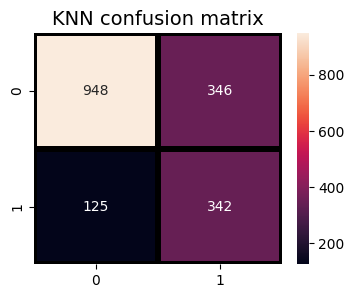

In [19]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN confusion matrix",fontsize=14)
plt.show()

In [23]:
N = 30

f1_train = []
f1_test = []
for n_neighbors in range(1, N+1):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_resampled, y_resampled)
    predicted_test_y = knn_model.predict(X_test)
    predicted_train_y = knn_model.predict(X_resampled)

    f1_test.append(f1_score(y_test, predicted_test_y))
    f1_train.append(f1_score(y_resampled, predicted_train_y))

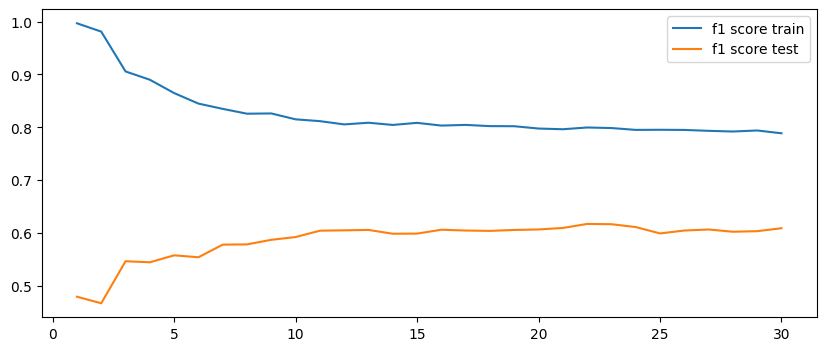

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot([i for i in range(1, N+1)], f1_train, label="f1 score train")
ax.plot([i for i in range(1, N+1)], f1_test, label="f1 score test")
ax.legend()

We see that f1-score of KNN here for test set seems to be a little bit higher than 0.6 when in our previous situation it couldn't rise to 0.6

<a id="logistic-regression"></a>
## Logistic Regression

<a id="logistic-regression-training"></a>
### Training

In [25]:
lr_model = LogisticRegression()
lr_model.fit(X_resampled,y_resampled)
predicted_y = lr_model.predict(X_test)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :", accuracy_lr)

Logistic Regression accuracy is : 0.7529812606473595


<a id="logistic-regression-evaluating"></a>
### Evaluating

In [26]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.81      1294
         1.0       0.52      0.80      0.63       467

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.75      0.77      1761



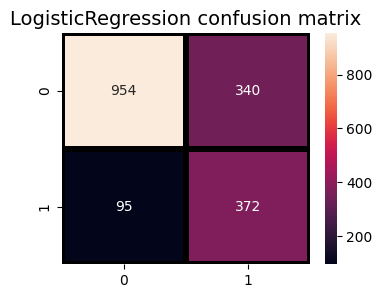

In [27]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LogisticRegression confusion matrix",fontsize=14)
plt.show()

<a id="svm"></a>
## SVM

<a id="svm-training"></a>
## Training

In [30]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_resampled,y_resampled)
predicted_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :", accuracy_svc)

SVM accuracy is : 0.7614991482112436


<a id="svm-evaluating"></a>
## Evaluating

In [31]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.90      0.76      0.82      1294
         1.0       0.53      0.78      0.63       467

    accuracy                           0.76      1761
   macro avg       0.72      0.77      0.73      1761
weighted avg       0.81      0.76      0.77      1761



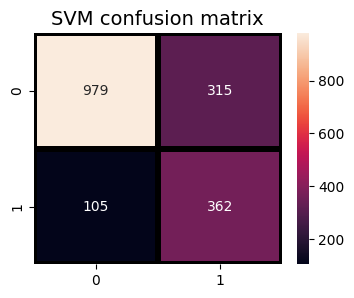

In [32]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVM confusion matrix",fontsize=14)
plt.show()

<a id="random-forest"></a>
## RandomForest

<a id="random-forest-training"></a>
### Training

In [34]:
model_rf = RandomForestClassifier(n_estimators=300, oob_score = True, n_jobs = -1,
                                  random_state=40, max_leaf_nodes = 30)

model_rf.fit(X_resampled, y_resampled)
# Make predictions
predicted_y = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, predicted_y))

0.7677455990914254


<a id="random-forest-evaluating"></a>
### Evaluating

In [35]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83      1294
         1.0       0.54      0.79      0.64       467

    accuracy                           0.77      1761
   macro avg       0.73      0.78      0.74      1761
weighted avg       0.81      0.77      0.78      1761



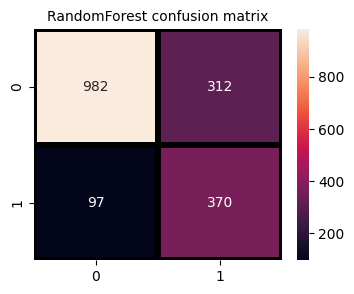

In [36]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RandomForest confusion matrix",fontsize=10)
plt.show()

In [37]:
N = 300

f1_train = []
f1_test = []
for n_estimators in tqdm(range(1, N+1)):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, n_jobs = -1,
                                      random_state=40, max_leaf_nodes = 30)
    rf_model.fit(X_resampled, y_resampled)
    predicted_test_y = rf_model.predict(X_test)
    predicted_train_y = rf_model.predict(X_resampled)

    f1_test.append(f1_score(y_test, predicted_test_y))
    f1_train.append(f1_score(y_resampled, predicted_train_y))

100%|█████████████████████████████████████████| 300/300 [01:08<00:00,  4.38it/s]


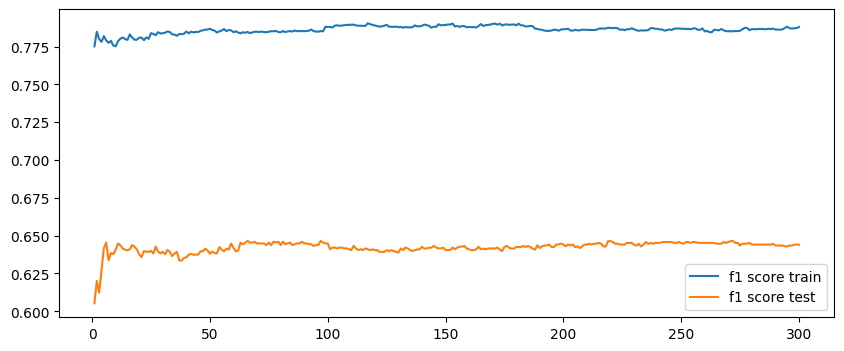

In [38]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot([i for i in range(1, N+1)], f1_train, label="f1 score train")
ax.plot([i for i in range(1, N+1)], f1_test, label="f1 score test")
ax.legend()

We see that random forest has much better f1-score on the test set than in the previous notebook. There was nearly 0.52 and here we have about 0.64

<a id="ada-boost"></a>
## AdaBoost

<a id="ada-boost-training"></a>
### Training

In [39]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_resampled, y_resampled)
predicted_y = ada_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, predicted_y)

AdaBoost Classifier accuracy


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.7529812606473595

<a id="ada-boost-evaluating"></a>
### Evaluating

In [41]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1294
         1.0       0.52      0.81      0.63       467

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.75      0.77      1761



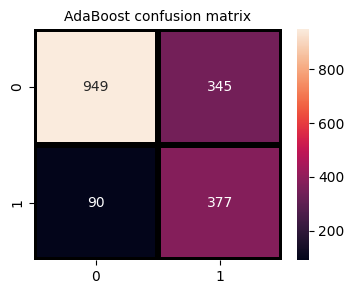

In [42]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost confusion matrix",fontsize=10)
plt.show()

<a id="conclusions"></a>
## Conclusions

In this notebook we have done ALL THE SAME as in the previous one but with resampled train data using the random oversampling technique. As a result we have received the next results:

1. **KNN** &ndash; **accuracy** 73.2%, **precision** 50% and **recall** 73% (previous values: accuracy 78%, precision 62%, recall 46%)<br><br> 
2. **Logistic Regression** &ndash; **accuracy** 75.2%, **precision** 52% and **recall** 80% (previous values: accuracy 79.8%, precision 66%, recall 50%)<br><br>
3. **SVM** &ndash; **accuracy** 76.1%, **precision** 53% and **recall** 78% (previous values: accuracy 79.3%, precision 65%, recall 47%)<br><br>
4. **RandomForest** &ndash; **accuracy** 76.7%, **precision** 54% and **recall** 79% (previous values: accuracy 78.9%, precision 65%, recall 44%)<br><br>
5. **AdaBoost** &ndash; **accuracy** 75.2%, **precision** 52% and **recall** 81% (previous values: accuracy 79.7%, precision 65%, recall 51%)

<p>What we see? We see strong improvement in recall on our test set. That means that our algorithms detects our class 1 better. </p>
<p>But on the other hand we see that the precision value is lower than without resampling. It means that our algorithms have more False-Positive classification (they predict "not churn class" objects as churn)</p>

<p>Generally here we have the situation of balanced classes which is better. And we have received better results from the point of view that our models can detect the class 1 better. Now we need to think how to force our models to make less false-positive classifications<p>